In [8]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [9]:
from society.agents import AnalyticalAgent
from society.structure.network import RealNetwork
from society.beliefs import Distribution, BeliefDistribution
from society.structure import AgentNetwork
from updates import Interactions, UpdateRule
from simulation import Simulation, Insights
from plotting.basic import *
import networkx as nx
from matplotlib import pyplot as plt
from computations.insights.relative import diversity, disagreement
from plotting.summaries import *
from utils.io import save_arrays

In [10]:
data_path = '../../../../results/data/real_networks/Facebook/'

In [11]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.15)
belief_distribution = BeliefDistribution(unique, linespace)
network = RealNetwork("Facebook", "../../../../data/")
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)

update_rule = UpdateRule(assimilation_bias=0, evaluation_bias=0, rewire_probability=1)
interactions = Interactions(update_rule, interacting_agents=True)
insights = Insights()
simulation = Simulation(1000, insights)

# Network Stats

In [12]:
G = agent_network.network.G

In [13]:
size = G.number_of_nodes()
size

4039

In [14]:
edges = G.number_of_edges()
edges

88234

In [15]:
degrees = dict(G.degree()).values()
sum_of_edges = sum(degrees)
average_degree = sum_of_edges/size
average_degree

43.69101262688784

In [16]:
nx.average_clustering(G)

0.6055467186200876

In [17]:
connected_component = G.subgraph(sorted(nx.connected_components(G))[0])
nx.average_shortest_path_length(connected_component)

3.6925068496963913

In [18]:
LCC = max([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])
LCC

4039

# Total Consensus

In [6]:
simulation.run(interactions, agent_network)

Progress: 100%|██████████| 1000/1000 [01:02<00:00, 16.02it/s]


/Users/martinprieto/Desktop/New_Honours_Refactored/src/plotting/basic.py:41: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.imshow(histogram.T, aspect="auto", interpolation=interpolation , vmax=np.quantile(histogram, qmax))


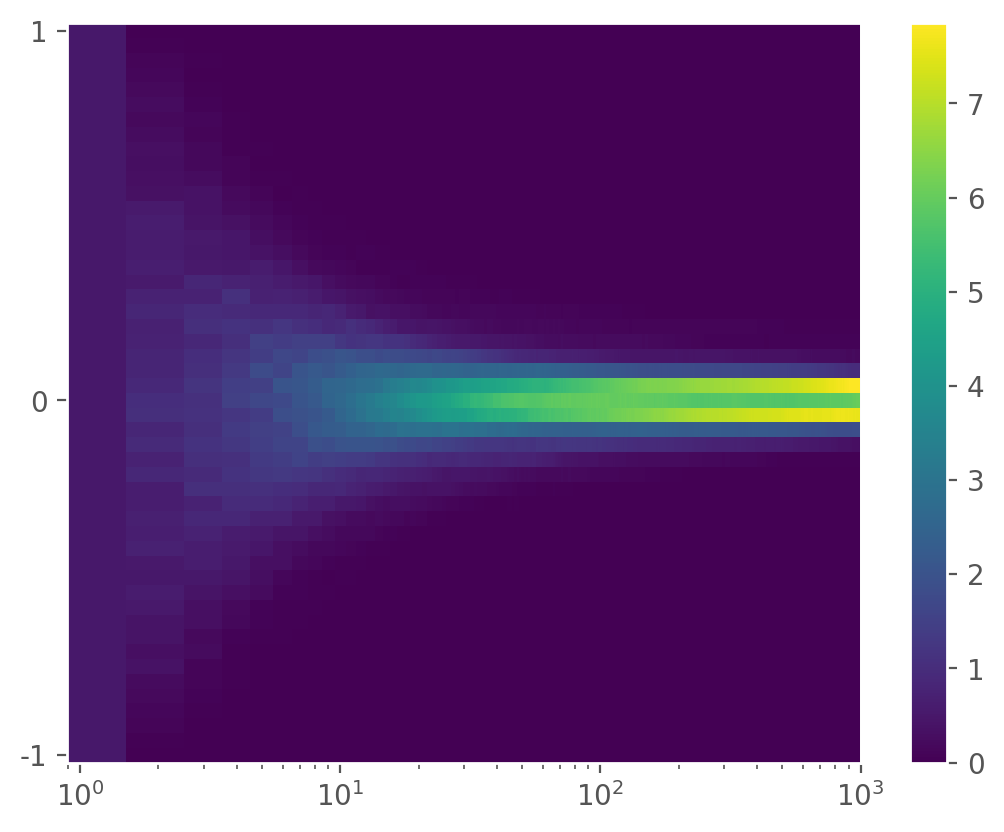

In [7]:
# Store results
with open(data_path + 'total_consensus.npy', 'wb') as f:
    np.save(f, simulation.insights.belief_evolution)
f.close()
plot_density_of_opinions(simulation.insights.belief_evolution)

# Fragmentation

In [8]:
interactions.update_rule.evaluation_bias = 0.3
simulation.run(interactions, agent_network)

Progress: 100%|██████████| 1000/1000 [01:23<00:00, 11.93it/s]


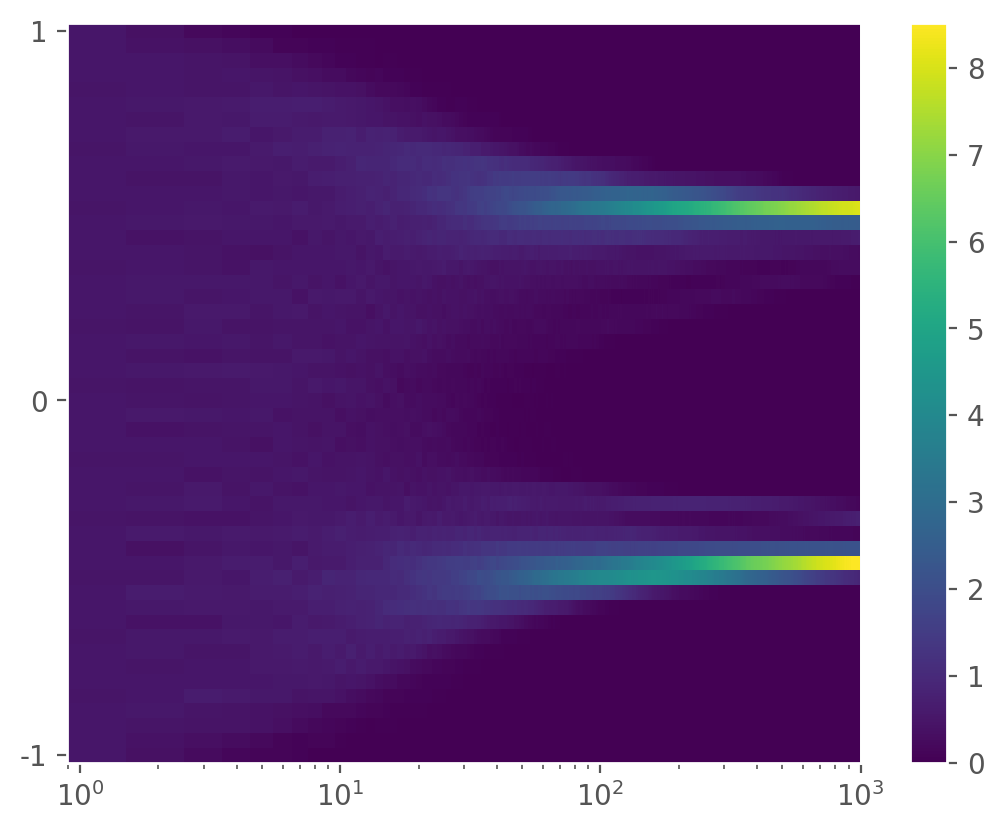

In [9]:
# Store results
with open(data_path + 'clustering.npy', 'wb') as f:
    np.save(f, simulation.insights.belief_evolution)
f.close()
plot_density_of_opinions(simulation.insights.belief_evolution)

# Dissensus

In [10]:
interactions.update_rule.evaluation_bias = 0.3
interactions.update_rule.assimilation_bias = 1
simulation.run(interactions, agent_network)

Progress: 100%|██████████| 1000/1000 [01:20<00:00, 12.40it/s]


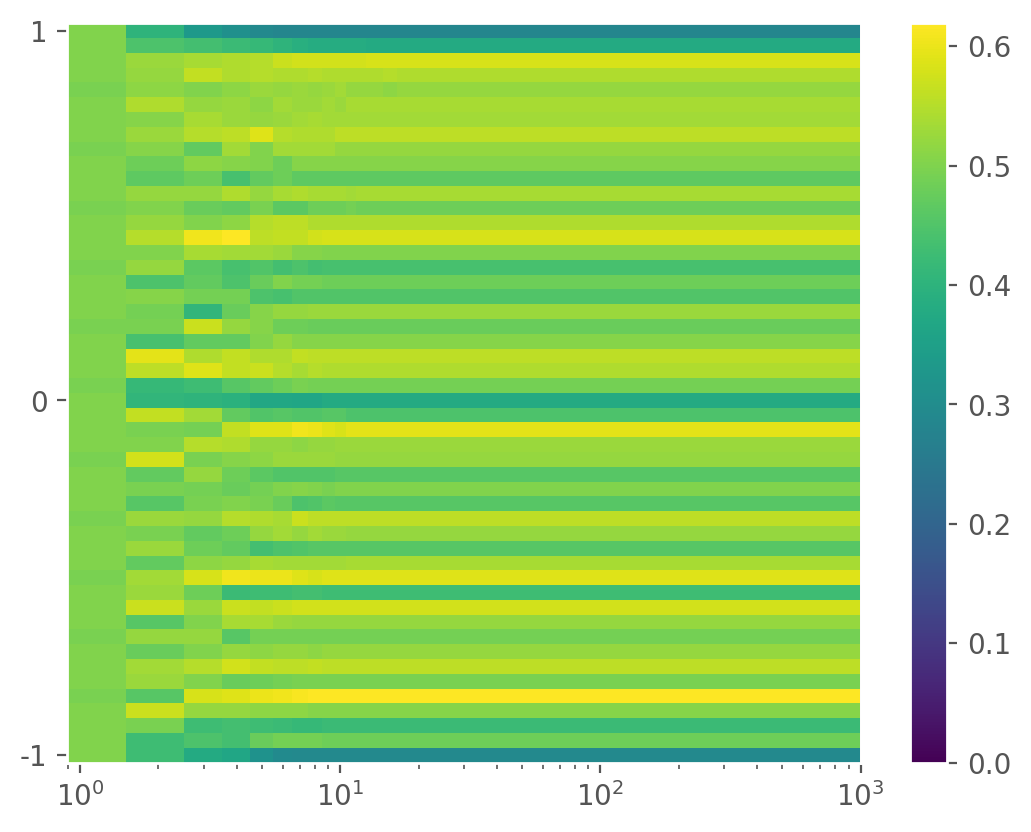

In [11]:
# Store results
with open(data_path + 'dissensus.npy', 'wb') as f:
    np.save(f, simulation.insights.belief_evolution)
f.close()
plot_density_of_opinions(simulation.insights.belief_evolution)

# Polarisation

In [5]:
interactions.update_rule.evaluation_bias = 0.3
interactions.update_rule.assimilation_bias = 0
unique = Distribution(type="unique", value=0.2)
belief_distribution = BeliefDistribution(unique, linespace)
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
extreme_num = agent_network.size//10
agent_network.set_extreme_agents(0.01, extreme_num, extreme_num)
simulation.run(interactions, agent_network)

Progress: 100%|██████████| 1000/1000 [02:27<00:00,  6.79it/s]


/Users/martinprieto/Desktop/New_Honours_Refactored/src/plotting/basic.py:41: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.imshow(histogram.T, aspect="auto", interpolation=interpolation , vmax=np.quantile(histogram, qmax))


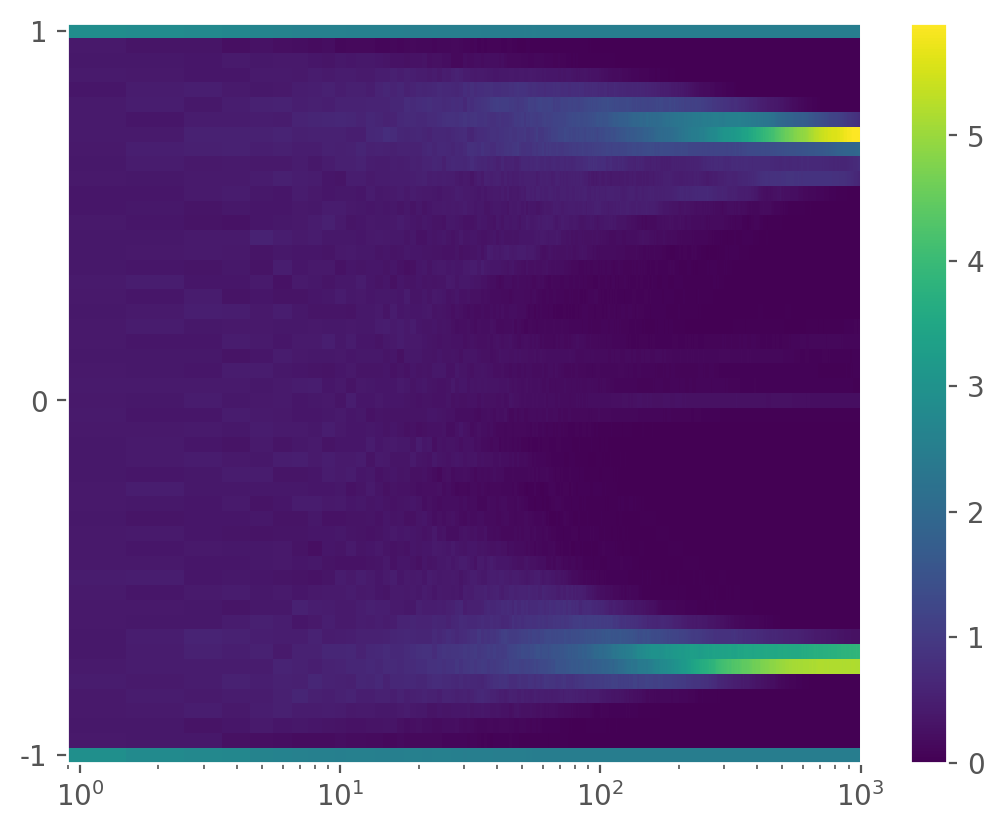

In [6]:
# Store results
with open(data_path + 'polarisation.npy', 'wb') as f:
    np.save(f, simulation.insights.belief_evolution)
f.close()
plot_density_of_opinions(simulation.insights.belief_evolution)